In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
%matplotlib inline


In [22]:
data = np.loadtxt('circular_logistic_regression_data.csv', delimiter=',', dtype=np.float64,skiprows=1)
X,y = data[:,:-1],data[:,-1].reshape((-1,1))

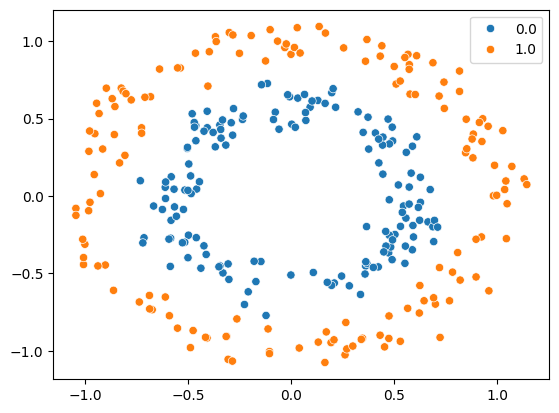

In [23]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y.flatten())
plt.show()

In [24]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [31]:
def loss(theta,X,y):
    h = sigmoid(np.dot(X,theta))
    cos = -(np.sum(y * np.log(h)) + np.sum((1-y)*np.log(1-h)))/len(y)
    return cos

def gradiant(theta,X,y):
    h = sigmoid(np.dot(X,theta))
    grad = np.dot(X.T,h-y)/len(y)
    return grad

In [26]:
def expand_feature(x1,x2,power=2):
    new_x = np.ones((x1.shape[0],1))
    for i in range(1,power+1):
        for j in range(i+1):
            new_x = np.append(new_x, (x1**(i-j)*(x2**j)).reshape(-1,1), axis=1)
    return new_x

In [27]:
def predict(thata, X):
    return (sigmoid(np.dot(X,thata)) > 0.5).flatten()

In [28]:
def gradiant_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X,theta))
        grad = gradiant(theta,X,y)
        theta = theta - (alpha * grad)
        costs.append(loss(theta,X,y))
    return theta, costs

In [29]:
def logistic_regression(X,y,power=2, alpha=0.01, iterations=100):
    X = expand_feature(X[:,0],X[:,1],power=power)
    theta = np.zeros((X.shape[1],1), dtype=np.float64)
    theta, costs = gradiant_descent(X, y, theta, alpha, iterations)
    predictions = predict(theta, X)
    return predictions, theta, costs

In [35]:
power, iterations = 20, 20000
predictions, theta, costs = logistic_regression(X, y, power=power, alpha=0.6, iterations=iterations)

accuracy = format(sum(predictions == y.flatten()) / len(y)*100)
print('Accuracy: ')
print(accuracy)

/var/folders/9f/rtk4z3t50tn3nvmzg65tmcxh0000gn/T/ipykernel_28550/1405920499.py:3: RuntimeWarning: divide by zero encountered in log
  cos = -(np.sum(y * np.log(h)) + np.sum((1-y)*np.log(1-h)))/len(y)
/var/folders/9f/rtk4z3t50tn3nvmzg65tmcxh0000gn/T/ipykernel_28550/1405920499.py:3: RuntimeWarning: invalid value encountered in multiply
  cos = -(np.sum(y * np.log(h)) + np.sum((1-y)*np.log(1-h)))/len(y)


Accuracy: 
100.0


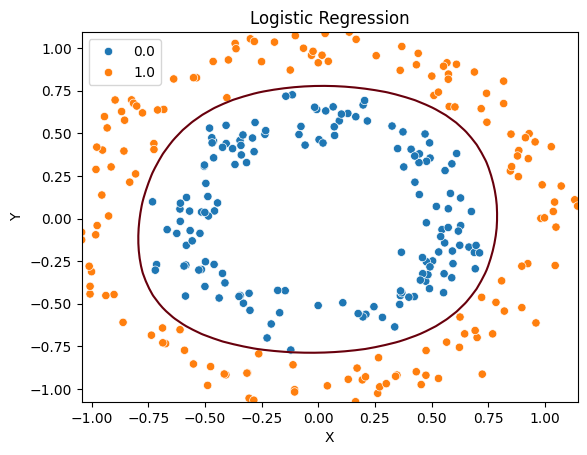

In [42]:
u = np.linspace(min(X[:,0]),max(X[:,0]),50)
v = np.linspace(min(X[:,1]),max(X[:,1]),50)

z = np.zeros((len(u),len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1), v[j].reshape(1,-1), power = power),theta).item()
z = np.transpose(z)

plt.contour(u,v,z,[0,0.01], cmap="Reds")
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y.flatten())
plt.title('Logistic Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [49]:
def cost_reg(theta, X, y, lam=0):
    h = sigmoid(np.dot(X,theta))
    theta1 = theta.copy()
    theta1[0] = 0
    cos = -(np.sum(y * np.log(h)) + np.sum((1-y)*np.log(1-h)))/len(y) + + (lam*np.sum(theta1*theta1))/len(y)
    return cos

In [43]:
def gradient_reg(theta, X, y, lam=0):
    h = sigmoid(np.dot(X,theta))
    theta1 = theta.copy()
    theta1[0] = 0
    grad = (np.dot(X.T, (h-y)) + 2*lam*theta1)/len(y)
    return grad

In [46]:
def gradient_descent_reg(X, y, theta, alpha, lam=0, iterations=100):
    m = len(y)
    costs = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X,theta))
        theta1 = theta.copy()
        theta1[0] = 0
        grad = gradient_reg(theta,X,y,lam=lam)
        theta = theta - (alpha * grad)
        costs.append(cost_reg(theta,X,y,lam=lam))
    return theta, costs

In [47]:
def logistic_regression_reg(X, y, power = 2, alpha = 0.01, lam=0, iterations=100):
    X = expand_feature(X[:,0],X[:,1],power=power)
    theta = np.zeros((X.shape[1],1), dtype=np.float64)
    theta, costs = gradient_descent_reg(X, y, theta, alpha, lam=lam, iterations=iterations)
    predictions = predict(theta, X)
    return predictions, theta, costs

In [51]:
power, iterations = 20, 20000
lam = 1
predictions, theta, costs = logistic_regression_reg(X, y, power, alpha=0.6, lam=lam)
accuracy = format(sum(predictions == y.flatten()) / len(y)*100)
print('Accuracy: ')
print(accuracy)

Accuracy: 
96.33333333333334


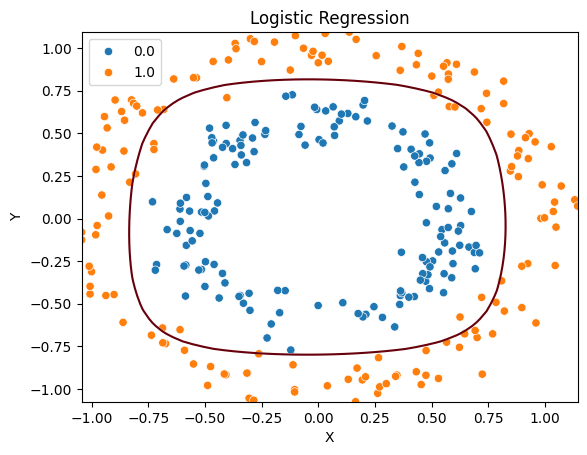

In [52]:
u = np.linspace(min(X[:,0]),max(X[:,0]),50)
v = np.linspace(min(X[:,1]),max(X[:,1]),50)

z = np.zeros((len(u),len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1), v[j].reshape(1,-1), power = power),theta).item()
z = np.transpose(z)

plt.contour(u,v,z,[0,0.01], cmap="Reds")
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y.flatten())
plt.title('Logistic Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
